In [1]:
import os
import sys
import pandas as pd

sys.path.append('../Scripts')
#from Timeseries_model import VARModel
from ARIMA import ARIMAComparison

In [2]:
# Example Usage
# Load your data with Date as index, and a 'Price' column for oil prices.
data = pd.read_csv('../Data/Copy of BrentOilPrices.csv', index_col='Date', parse_dates=True)
print(data.shape)
print(data.head())

model_comparison = ARIMAComparison(data)
model_comparison.fit_simple_arima()
model_comparison.fit_markov_switching_arima()
model_comparison.plot_comparison()

C:\Users\Addisu\AppData\Local\Temp\ipykernel_24252\3201333327.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../Data/Copy of BrentOilPrices.csv', index_col='Date', parse_dates=True)


(9011, 1)
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


d:\10 ACADAMY KIFIYA\Week 10\Event-Driven-Brent-Oil-Analysis\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 ACADAMY KIFIYA\Week 10\Event-Driven-Brent-Oil-Analysis\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 ACADAMY KIFIYA\Week 10\Event-Driven-Brent-Oil-Analysis\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Simple ARIMA Results:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Mon, 04 Nov 2024   AIC                          29093.899
Time:                        14:42:09   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.0

d:\10 ACADAMY KIFIYA\Week 10\Event-Driven-Brent-Oil-Analysis\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NotImplementedError: 

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu1, mu2, sigma]
>BinaryGibbsMetropolis: [state]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9653 seconds.
d:\10 ACADAMY KIFIYA\Week 10\Event-Driven-Brent-Oil-Analysis\env\Lib\site-packages\arviz\stats\diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


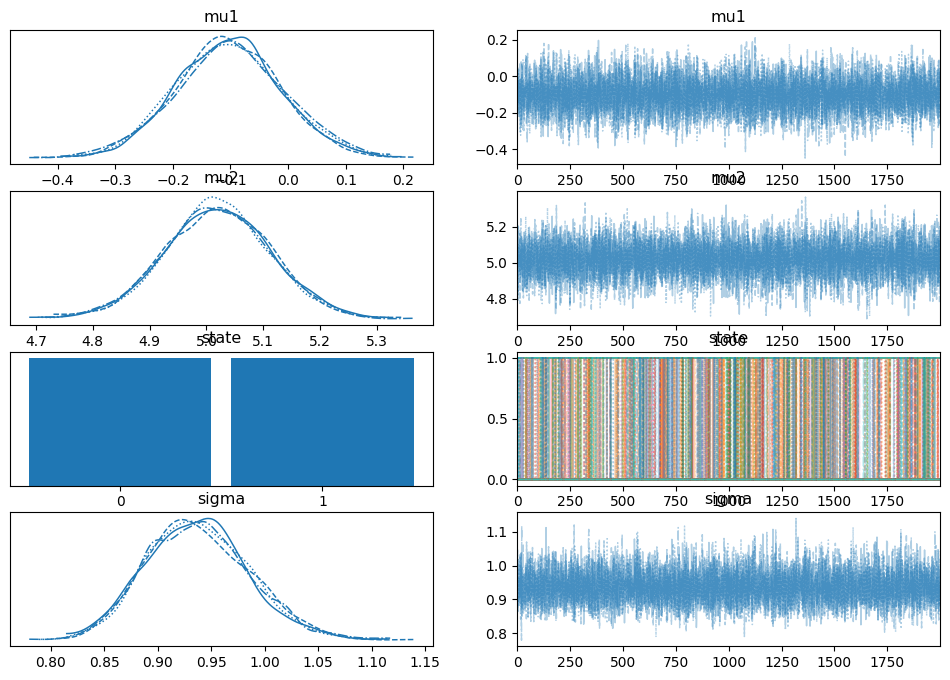

In [3]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

# Simulate some data or load your actual data
np.random.seed(42)
n_samples = 100
data = np.concatenate([
    np.random.normal(loc=0, scale=1, size=n_samples),
    np.random.normal(loc=5, scale=1, size=n_samples)
])

with pm.Model() as model:
    # Priors for the means of the two states
    mu1 = pm.Normal('mu1', mu=0, sigma=10)
    mu2 = pm.Normal('mu2', mu=5, sigma=10)
    
    # Prior for the standard deviation
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Prior for the state
    state = pm.Categorical('state', p=[0.5, 0.5], shape=len(data))
    
    # Likelihood
    observations = pm.Normal('obs', mu=pm.math.switch(state, mu1, mu2), sigma=sigma, observed=data)

    # Sampling from the posterior
    trace = pm.sample(2000, tune=1000)

# Analyze results
pm.plot_trace(trace)
plt.show()